In [1]:
%pip install matplotlib
%pip install phasespace

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import phasespace as phsp
import numpy as np
m0 = 5000
m1 = 200
m2 = 1000
m3 = 998
m4 = 200

# arbitrary masses, since it does not really matter, if the particles do exist or not
# Also I couldnt remermber masses for particles, so here we go

weights, p = phsp.nbody_decay(m0, [m1, m2, m3, m4]).generate(1)


global_momenta = {
    i + 1: np.array(p[f"p_{i}"])
        for i in range(4)
}
global_momenta

2024-06-04 12:50:17.302599: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-04 12:50:17.302915: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 12:50:17.306095: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 12:50:17.340429: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 12:50:17.978700: W tensorflow/compiler/tf2tensorrt/utils/py_uti

{1: array([[ 793.262795  , 1033.01121433,  184.58379979, 1330.58228232]]),
 2: array([[ -542.11028426, -1616.90635274,    -4.74816582,  1976.94012527]]),
 3: array([[-107.15356316,  853.26315713, -156.00117301, 1326.60478945]]),
 4: array([[-143.99894758, -269.36801873,  -23.83446097,  365.87280296]])}

In [3]:
import numpy as np
from decayangle.lorentz import LorentzTrafo
from decayangle.decay_topology import Topology
from decayangle.config import config as cfg
import matplotlib.pyplot as plt


topology = Topology(root=0, decay_topology=(((2,4),1),3))
reference = Topology(root=0, decay_topology=(((3,2),1),4))
print(topology)
print(reference)

def make_four_vectors(phi_rf, theta_rf, psi_rf):
    import numpy as np
    # Make sure, the sorting is turned off
    cfg.sorting = "off"
    momenta = topology.to_rest_frame(global_momenta)
    # momenta_rotated = topology.align_with_daughter(momenta, 3)
    rotation = LorentzTrafo(0, 0, 0, phi_rf, theta_rf, psi_rf)
    momenta_rotated = reference.root.transform(rotation, momenta)
    momenta_rotated = topology.to_rest_frame(momenta_rotated)

    return momenta_rotated


Topology: ( 0 -> ( (1, 2, 4) -> ( (2, 4) -> 2, 4 ), 1 ), 3 )
Topology: ( 0 -> ( (1, 2, 3) -> ( (2, 3) -> 2, 3 ), 1 ), 4 )


In [4]:
N = 1000
x = np.linspace(1e-5, np.pi - 1e-5, N)
y = np.linspace(-np.pi + 1e-5, np.pi - 1e-5, N)

X, Y = np.meshgrid(x, y)
momenta_23_rotated = make_four_vectors(0.7, X, Y)

from decayangle.kinematics import gamma





In [5]:
result_full = topology.relative_wigner_angles(reference, momenta_23_rotated)

result_psi = result_full[1].psi_rf
result_phi = result_full[1].phi_rf
result_theta = result_full[1].theta_rf
result = result_psi + result_phi

def fmod_4(val):
    return np.round(np.fmod(val/np.pi + 4,4),8)


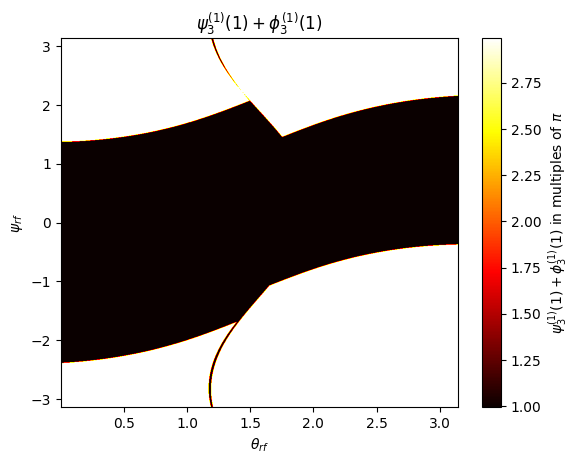

In [6]:
img = plt.imshow(fmod_4(result), cmap='hot', origin='lower',
                 extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')

plt.colorbar(label=r"$\psi_{3}^{(1)}(1) + \phi_{3}^{(1)}(1)$ in multiples of $\pi$")
plt.xlabel(r'$\theta_{rf}$')
plt.ylabel(r'$\psi_{rf}$')
plt.title(r"$\psi_{3}^{(1)}(1) + \phi_{3}^{(1)}(1)$")
plt.savefig('test.png', dpi = 1200)
plt.show()
plt.close('all')

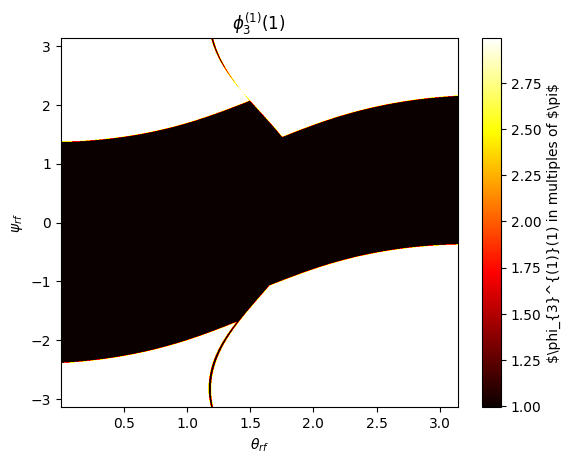

In [7]:
img = plt.imshow(fmod_4(result_phi), cmap='hot', origin='lower',
                 extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')

plt.colorbar(label=r"$\phi_{3}^{(1)}(1) in multiples of $\pi$")
plt.xlabel(r'$\theta_{rf}$')
plt.ylabel(r'$\psi_{rf}$')
plt.title(r"$\phi_{3}^{(1)}(1)$")
plt.savefig('test_phi.png', dpi = 1200)
plt.show()
plt.close('all')

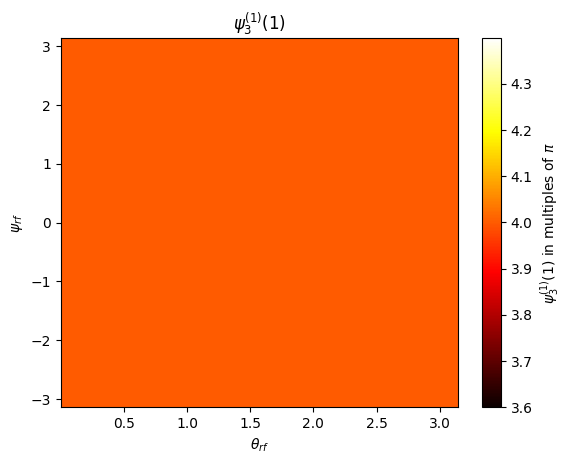

In [8]:
img = plt.imshow(fmod_4(result_psi), cmap='hot', origin='lower',
                 extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')

plt.colorbar(label=r"$\psi_{3}^{(1)}(1)$ in multiples of $\pi$")
plt.xlabel(r'$\theta_{rf}$')
plt.ylabel(r'$\psi_{rf}$')
plt.title(r"$\psi_{3}^{(1)}(1)$")
plt.savefig('test_psi.png', dpi = 1200)
plt.show()
plt.close('all')

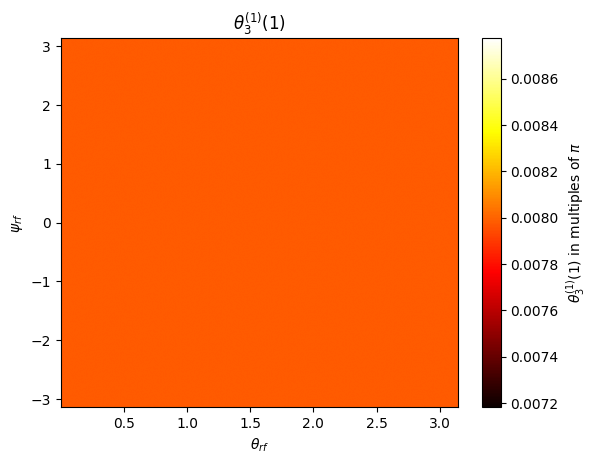

In [9]:
img = plt.imshow(fmod_4(result_theta), cmap='hot', origin='lower',
                 extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')

plt.colorbar(label=r"$\theta_{3}^{(1)}(1)$ in multiples of $\pi$")
plt.xlabel(r'$\theta_{rf}$')
plt.ylabel(r'$\psi_{rf}$')
plt.title(r"$\theta_{3}^{(1)}(1)$")
plt.savefig('test_theta.png', dpi = 1200)
plt.show()
plt.close('all')